In [ ]:
from google.colab import files

uploaded = files.upload()

# Assuming you've uploaded a single ZIP file, get its filename.
zip_file_name = next(iter(uploaded.keys()))
print(f"Uploaded file: {zip_file_name}")


In [ ]:
!unzip "$zip_file_name" -d "/content/unzipped_contents/"


In [71]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [133]:
books_df = pd.read_csv("/content/Books.csv")

<ipython-input-133-2a9229550283>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("/content/Books.csv")


In [134]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [135]:
rating_df = pd.read_csv("/content/Ratings.csv")

In [136]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [137]:
# Merging the dataframes based on 'ISBN' and including the specified additional columns
merged_df = pd.merge(books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']], rating_df, on='ISBN', how='inner')[['User-ID', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Book-Rating']]

# Display the first few rows of the merged dataframe and its shape to confirm the structure
merged_df.head(), merged_df.shape

(   User-ID        ISBN           Book-Title           Book-Author  \
 0        2  0195153448  Classical Mythology    Mark P. O. Morford   
 1        8  0002005018         Clara Callan  Richard Bruce Wright   
 2    11400  0002005018         Clara Callan  Richard Bruce Wright   
 3    11676  0002005018         Clara Callan  Richard Bruce Wright   
 4    41385  0002005018         Clara Callan  Richard Bruce Wright   
 
   Year-Of-Publication                Publisher  \
 0                2002  Oxford University Press   
 1                2001    HarperFlamingo Canada   
 2                2001    HarperFlamingo Canada   
 3                2001    HarperFlamingo Canada   
 4                2001    HarperFlamingo Canada   
 
                                          Image-URL-S  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://images.amazon.com/images/P/0002005018.0...   
 2  http://images.amazon.com/images/P/0002005018.0...   
 3  http://images.amazon.com/images/P/0002

In [138]:
# Save the merged dataframe to a new CSV file
merged_csv_path = '/content/merged_books_ratings.csv'
merged_df.to_csv(merged_csv_path, index=False)

merged_csv_path

'/content/merged_books_ratings.csv'

In [139]:
rating_df = pd.read_csv(merged_csv_path)

<ipython-input-139-eda9a4e816fd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  rating_df = pd.read_csv(merged_csv_path)


In [140]:
rating_df.shape

(1031136, 10)

In [141]:
rating_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
Book-Rating            0
dtype: int64

In [142]:
rating_df = rating_df.dropna()

In [143]:
rating_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Book-Rating            0
dtype: int64

In [144]:
rating_df.duplicated().sum()

0

In [145]:
zero_ratings = rating_df['Book-Rating'].value_counts()[0]
zero_ratings

647291

In [146]:
unique_users = rating_df['User-ID'].nunique()
unique_users

92106

In [147]:
unique_books = rating_df['ISBN'].nunique()
unique_books

270145

In [148]:
import matplotlib.pyplot as plt

# Ratings distribution
ratings_distribution = rating_df['Book-Rating'].value_counts().sort_index()
ratings_distribution

0     647291
1       1481
2       2375
3       5118
4       7617
5      45355
6      31687
7      66401
8      91803
9      60776
10     71225
Name: Book-Rating, dtype: int64

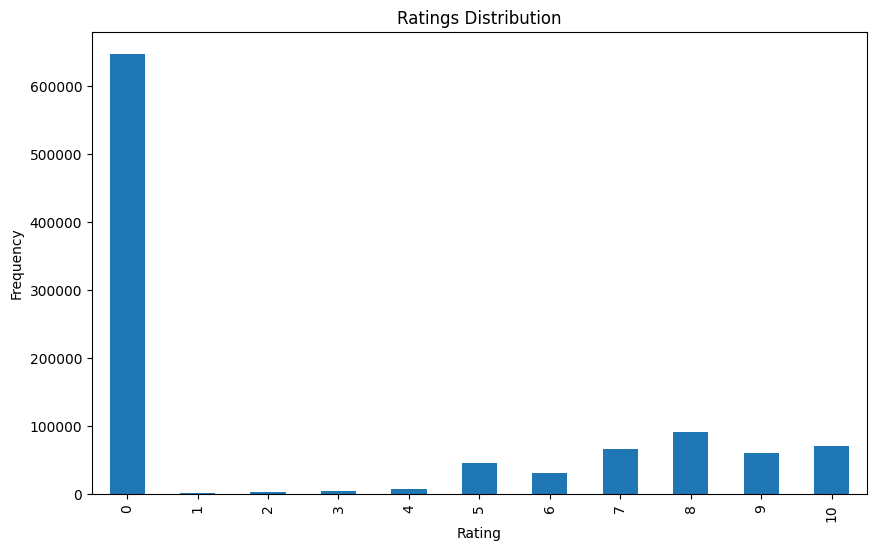

In [149]:
# Plotting ratings distribution
plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [150]:
# Ratings per user
ratings_per_user = rating_df.groupby('User-ID')['Book-Rating'].count().sort_index()
ratings_per_user

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

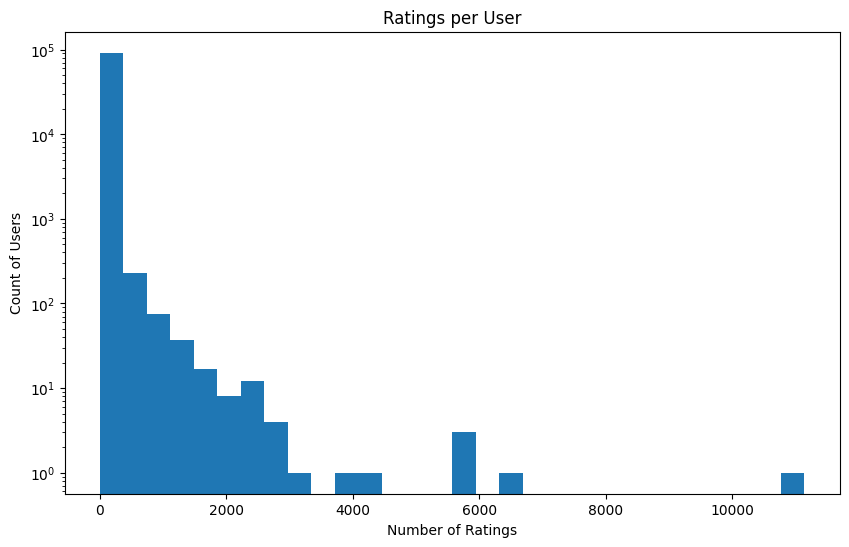

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user.values, bins=30, log=True)
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

In [152]:
# Ratings per book
ratings_per_book = rating_df.groupby('ISBN')['Book-Rating'].count().sort_index()
ratings_per_book.head()

ISBN
0000913154    1
0001010565    2
0001046438    1
0001046713    1
000104687X    1
Name: Book-Rating, dtype: int64

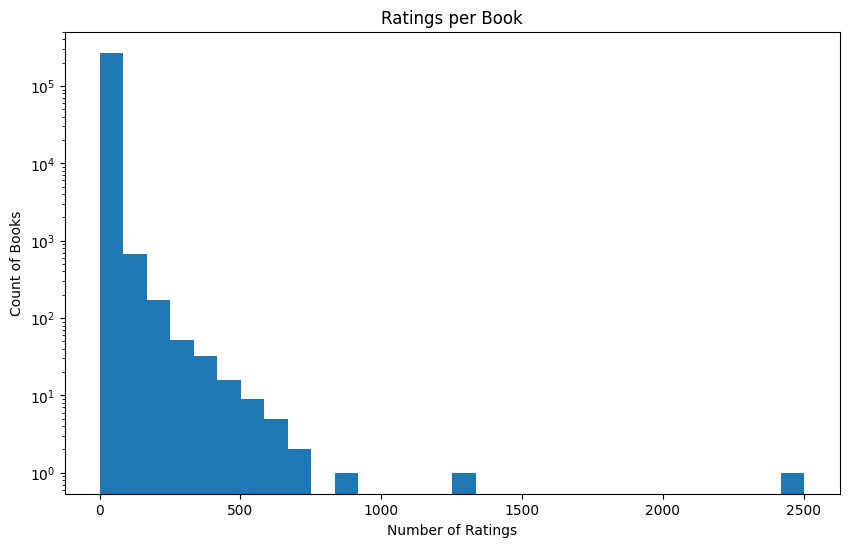

In [153]:
# Plotting ratings per book
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_book.values, bins=30, log=True)
plt.title('Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Books')
plt.show()

In [154]:
from scipy.sparse import csr_matrix

# Assuming 'df' is your original ratings DataFrame
user_ids = rating_df['User-ID'].astype("category").cat.codes
item_ids = rating_df['ISBN'].astype("category").cat.codes
ratings = rating_df['Book-Rating']

# Create a sparse matrix
user_item_matrix_sparse = csr_matrix((ratings, (user_ids, item_ids)), shape=(user_ids.max() + 1, item_ids.max() + 1))

print(user_item_matrix_sparse)


  (0, 24927)	0
  (1, 73)	5
  (1, 8175)	0
  (1, 59963)	0
  (1, 71447)	0
  (1, 77555)	0
  (1, 82278)	0
  (1, 141124)	0
  (1, 143074)	0
  (1, 157286)	5
  (1, 166205)	0
  (1, 176656)	0
  (1, 202760)	5
  (1, 218666)	5
  (1, 221772)	0
  (1, 227000)	6
  (1, 230854)	6
  (1, 241536)	7
  (2, 87241)	0
  (2, 103362)	6
  (2, 129457)	0
  (3, 236547)	0
  (4, 241114)	10
  (5, 9807)	5
  (5, 83699)	5
  :	:
  (92103, 88332)	5
  (92103, 115631)	0
  (92103, 118105)	0
  (92103, 136632)	7
  (92103, 156891)	0
  (92103, 165573)	5
  (92103, 171397)	5
  (92103, 190666)	7
  (92103, 201534)	7
  (92103, 205167)	5
  (92103, 207838)	7
  (92103, 208284)	8
  (92103, 221371)	8
  (92103, 226514)	0
  (92103, 228174)	10
  (92103, 242207)	7
  (92104, 97747)	8
  (92105, 37984)	7
  (92105, 61716)	7
  (92105, 81712)	7
  (92105, 81798)	7
  (92105, 107646)	0
  (92105, 118016)	6
  (92105, 121631)	0
  (92105, 121696)	8


In [155]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming user_item_matrix_sparse is your sparse matrix
user_similarity = cosine_similarity(user_item_matrix_sparse, dense_output=False)
item_similarity = cosine_similarity(user_item_matrix_sparse.T, dense_output=False)


In [156]:
print(user_similarity)

  (1, 74675)	0.06598795479344474
  (1, 87044)	0.03784080109036774
  (1, 72126)	0.05898804727117089
  (1, 69462)	0.14823417800568506
  (1, 65830)	0.2852126942296184
  (1, 40854)	0.3363363969981562
  (1, 38623)	0.048873909204594515
  (1, 22455)	0.12655946698124634
  (1, 3629)	0.004234516427955321
  (1, 1)	0.9999999999999999
  (2, 89662)	0.14488189694993617
  (2, 89655)	0.5598925109558544
  (2, 89200)	0.23863697995167382
  (2, 87944)	0.17908612711114455
  (2, 87390)	0.14436106547701633
  (2, 85410)	0.27146264489895156
  (2, 84057)	0.27934688485989034
  (2, 83556)	0.3606678538669729
  (2, 82895)	0.4691574316284183
  (2, 82854)	0.2564682254550006
  (2, 79618)	0.3862269678805871
  (2, 79333)	0.11717917486340808
  (2, 79311)	0.8320502943378436
  (2, 76437)	0.43726946944662604
  (2, 73843)	0.10375027518676229
  :	:
  (92105, 24595)	0.05642226451917658
  (92105, 22832)	0.4068667356033675
  (92105, 22102)	0.12938336315540333
  (92105, 21524)	0.04348208197492612
  (92105, 21249)	0.197359356052110

In [157]:
print(item_similarity)

  (0, 262466)	1.0
  (0, 261956)	1.0
  (0, 243726)	0.7682212795973759
  (0, 241197)	1.0
  (0, 240750)	0.3866945956182654
  (0, 239794)	0.375
  (0, 239674)	1.0
  (0, 239449)	1.0
  (0, 239059)	0.554700196225229
  (0, 238463)	1.0
  (0, 237969)	1.0
  (0, 237717)	0.21925149171034317
  (0, 237697)	1.0
  (0, 237691)	0.5832118435198043
  (0, 235747)	0.12469593727770992
  (0, 235667)	1.0
  (0, 234613)	1.0
  (0, 234234)	0.5185629788417315
  (0, 234228)	0.5261522196019802
  (0, 234227)	0.5734623443633283
  (0, 234164)	1.0
  (0, 233237)	1.0
  (0, 232885)	1.0
  (0, 232608)	1.0
  (0, 232251)	1.0
  :	:
  (270139, 11210)	0.1938736881594737
  (270139, 11151)	0.8320502943378436
  (270139, 10765)	0.423999152002544
  (270139, 10527)	0.4142242984627982
  (270139, 9794)	0.6246950475544243
  (270139, 9353)	0.48686449556014766
  (270139, 9332)	1.0
  (270139, 9319)	0.4437601569801833
  (270139, 9312)	0.5397841295136605
  (270139, 9296)	0.2656844656620286
  (270139, 9207)	0.4472135954999579
  (270139, 8436)	0.50

In [158]:
# Convert ISBN to category and obtain category codes
rating_df['ISBN_code'] = rating_df['ISBN'].astype('category').cat.codes

# Create item mapping from indices to original ISBNs
item_mapping = dict(enumerate(rating_df['ISBN'].astype('category').cat.categories))

# Now, item_mapping is a dictionary where keys are numerical indices and values are the original ISBNs

def user_user_recommendations_sparse(user_id, user_similarity=user_similarity, user_item_matrix=user_item_matrix_sparse, item_mapping=item_mapping, top_n=5):
    # Ensure the user_item_matrix is in CSR format for efficient row querying
    if not isinstance(user_item_matrix, csr_matrix):
        user_item_matrix = csr_matrix(user_item_matrix)

    # Get the similarity scores for the target user directly from the sparse matrix
    similarity_scores = user_similarity.getrow(user_id).toarray().flatten()

    # Predict scores by multiplying the similarity scores with the user-item matrix
    pred_scores = user_item_matrix.T.dot(similarity_scores).flatten() # Removed .toarray() here

    # Get indices of already rated items to filter them out from recommendations
    rated_items = user_item_matrix.getrow(user_id).nonzero()[1]

    # Recommend items that the user hasn't rated yet
    recommendations = [(item, score) for item, score in enumerate(pred_scores) if item not in rated_items]

    # Sort the recommendations based on scores and return the top N
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Map indices to original ISBN numbers
    recommended_isbns = [item_mapping[item] for item, score in recommendations[:top_n]]

    return recommended_isbns

# Example usage:
# Assuming user_id is an integer corresponding to the index in the user_similarity matrix
# and user_item_matrix_sparse is the original sparse matrix you created
user_recommendations = user_user_recommendations_sparse(10, user_similarity, user_item_matrix_sparse,item_mapping, top_n=5)
print(user_recommendations)


['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']


In [159]:
# Filter the DataFrame to include only 'User-ID', 'ISBN', and 'Book-Rating' columns
ratings_filtered_df = rating_df[['User-ID', 'ISBN', 'Book-Rating']]

# Display the first few rows of the filtered DataFrame and its shape to confirm
ratings_filtered_df.head(), ratings_filtered_df.shape

(   User-ID        ISBN  Book-Rating
 0        2  0195153448            0
 1        8  0002005018            5
 2    11400  0002005018            0
 3    11676  0002005018            8
 4    41385  0002005018            0,
 (1031129, 3))

In [160]:
import numpy as np

def train_test_split(ratings, test_size=0.2):
    # Ensure deterministic results
    np.random.seed(42)

    # Create a mask of the same size as the ratings dataset, initially set to False
    test_mask = np.zeros(len(ratings), dtype=bool)

    # For each user, randomly select test_size percentage of ratings to be included in the test set
    for user_id in ratings['User-ID'].unique():
        user_ratings = ratings[ratings['User-ID'] == user_id]
        test_indices = np.random.choice(user_ratings.index, size=int(len(user_ratings) * test_size), replace=False)
        test_mask[test_indices] = True

    # Split the dataset
    test_ratings = ratings[test_mask]
    train_ratings = ratings[~test_mask]

    return train_ratings, test_ratings

# Assuming ratings_df is your DataFrame
train_df, test_df = train_test_split(ratings_filtered_df, test_size=0.2)

# Display the first few rows of the train and test datasets to verify
train_df.head(), test_df.head(), train_df.shape, test_df.shape


(   User-ID        ISBN  Book-Rating
 0        2  0195153448            0
 4    41385  0002005018            0
 5    67544  0002005018            8
 6    85526  0002005018            0
 7    96054  0002005018            0,
     User-ID        ISBN  Book-Rating
 1         8  0002005018            5
 2     11400  0002005018            0
 3     11676  0002005018            8
 10   177458  0002005018            0
 15        8  0060973129            0,
 (852952, 3),
 (178177, 3))

In [161]:
 # Create a sparse user-item matrix for the training set
# Map User-ID and ISBN to categorical codes to work with sparse matrix
user_ids = train_df['User-ID'].astype("category").cat.codes
isbn_codes = train_df['ISBN'].astype("category").cat.codes

# Create a sparse matrix with users as rows, items as columns, and ratings as values
train_matrix = csr_matrix((train_df['Book-Rating'], (user_ids, isbn_codes)))

# Compute the cosine similarity between users
users_similarity = cosine_similarity(train_matrix, dense_output=False)

In [162]:
users_similarity.shape

(90762, 90762)

In [163]:
user_mapping = dict(enumerate(train_df['User-ID'].astype("category").cat.categories))

In [164]:
def predict_user_rating(user_id, isbn, users_similarity, train_matrix, user_mapping, item_mapping):
    """
    Predicts the rating a user would give to an item.

    Parameters:
    - user_id: The ID of the user (as per original dataset).
    - isbn: The ISBN of the book (as per original dataset).
    - user_similarity: A sparse matrix of user-user similarities.
    - train_matrix: A sparse matrix of user-item ratings from the training set.
    - user_mapping: A dictionary mapping the user matrix index to the User-ID.
    - item_mapping: A dictionary mapping the item matrix index to the ISBN.

    Returns:
    - The predicted rating for the user-item pair.
    """
    # Find the matrix indices for the user and item
    user_index = {v: k for k, v in user_mapping.items()}.get(user_id, None)
    item_index = {v: k for k, v in item_mapping.items()}.get(isbn, None)

    if user_index is None or item_index is None:
        # User or item not found in the training set, return a default prediction
        return 0

    # Get the similarity scores for this user and all other users
    similarity_scores = user_similarity[user_index].toarray().flatten()

    # Get all ratings for the item
    item_ratings = train_matrix[:, item_index].toarray().flatten()

    # Compute the predicted rating
    weighted_scores = similarity_scores * item_ratings
    if weighted_scores.sum() > 0:
        predicted_rating = np.dot(item_ratings, similarity_scores) / np.sum(similarity_scores[item_ratings > 0])
    else:
        predicted_rating = 0  # Fallback prediction if no similar users have rated this item

    return predicted_rating


In [165]:
# # Example usage:
# test_user_id = test_df.iloc[0]['User-ID']
# test_isbn = test_df.iloc[0]['ISBN']
# predicted_rating = predict_user_rating(test_user_id, test_isbn, users_similarity, train_matrix, user_mapping, item_mapping)
# print(f"Predicted rating for User-ID {test_user_id} and ISBN {test_isbn}: {predicted_rating}")

In [166]:
def get_books_details(isbn_list, rating_df=rating_df):
    # Filter the books dataframe for the given ISBNs
    filtered_books = rating_df[rating_df['ISBN'].isin(isbn_list)]

    # Select required columns
    filtered_books = filtered_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']]

    # Convert the dataframe to a dictionary format that matches the desired output
    books_details = filtered_books.to_dict(orient='records')

    return books_details

# Example ISBN list from user-user based collaborative filtering for user ID = 10
# isbn_list = ['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']

# Assuming books_df is your dataframe containing all book details
books_details = get_books_details(user_recommendations, rating_df)

# Print or use the books_details for your API work
print(books_details)


[{'ISBN': '0001046438', 'Book-Title': 'Liar', 'Book-Author': 'Stephen Fry', 'Year-Of-Publication': 0, 'Publisher': 'Harpercollins Uk', 'Image-URL-S': 'http://images.amazon.com/images/P/0001046438.01.THUMBZZZ.jpg', 'Image-URL-M': 'http://images.amazon.com/images/P/0001046438.01.MZZZZZZZ.jpg', 'Image-URL-L': 'http://images.amazon.com/images/P/0001046438.01.LZZZZZZZ.jpg'}, {'ISBN': '000104687X', 'Book-Title': 'T.S. Eliot Reading \\The Wasteland\\" and Other Poems"', 'Book-Author': 'T.S. Eliot', 'Year-Of-Publication': 1993, 'Publisher': 'HarperCollins Publishers', 'Image-URL-S': 'http://images.amazon.com/images/P/000104687X.01.THUMBZZZ.jpg', 'Image-URL-M': 'http://images.amazon.com/images/P/000104687X.01.MZZZZZZZ.jpg', 'Image-URL-L': 'http://images.amazon.com/images/P/000104687X.01.LZZZZZZZ.jpg'}, {'ISBN': '0001046713', 'Book-Title': 'Twopence to Cross the Mersey', 'Book-Author': 'Helen Forrester', 'Year-Of-Publication': 1992, 'Publisher': 'HarperCollins Publishers', 'Image-URL-S': 'http:/

In [180]:
isbn_to_index_mapping = {v: k for k, v in item_mapping.items()}

In [189]:
# Create a mapping from book titles to ISBNs
title_to_isbn_mapping = pd.Series(books_df['ISBN'].values, index=books_df['Book-Title']).to_dict()


In [190]:
def item_item_recommendations_sparse_by_title(book_title, title_to_isbn_mapping, item_similarity, user_item_matrix, isbn_to_index_mapping, item_mapping, top_n=5):
    # Convert book title to ISBN
    isbn = title_to_isbn_mapping.get(book_title)
    if isbn is None:
        return []  # Book title not found

    # Convert ISBN to item index
    item_index = isbn_to_index_mapping.get(isbn)
    if item_index is None:
        return []  # ISBN not found in the index mapping

    # Follow the existing process to get similarity scores and generate recommendations
    similarity_scores = item_similarity.getcol(item_index).toarray().flatten()
    recommendations = [(item, score) for item, score in enumerate(similarity_scores) if item != item_index]
    recommendations.sort(key=lambda x: x[1], reverse=True)
    recommended_isbns = [item_mapping[item] for item, score in recommendations[:top_n]]

    return recommended_isbns


In [191]:
example_title = 'Forms of Devotion: Stories and Pictures'  # Replace this with an actual book title from your dataset

recommended_isbns = item_item_recommendations_sparse_by_title(
    example_title,
    title_to_isbn_mapping,
    item_similarity,
    user_item_matrix_sparse,
    isbn_to_index_mapping,
    item_mapping,
    top_n=5
)

print(f"Recommended items for book title '{example_title}': {recommended_isbns}")


Recommended items for book title 'Forms of Devotion: Stories and Pictures': ['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']


In [204]:
import pickle

recommendation_functions = {
    'user_similarity': user_similarity,
    'item_similarity':item_similarity,
    'rating_df':rating_df,
    'top_n':5,
    'user_item_matrix_sparse':user_item_matrix_sparse,
    'item_mapping':item_mapping,
    'title_to_isbn_mapping':title_to_isbn_mapping,
    'isbn_to_index_mapping':isbn_to_index_mapping

}

with open("recommendation.pkl", "wb") as pickle_out:
    pickle.dump(recommendation_functions, pickle_out)




In [201]:
def user_user_recommendations_sparse(user_id, user_similarity, user_item_matrix, item_mapping, top_n=5):
    # Ensure the user_item_matrix is in CSR format for efficient row querying
    if not isinstance(user_item_matrix, csr_matrix):
        user_item_matrix = csr_matrix(user_item_matrix)

    # Get the similarity scores for the target user directly from the sparse matrix
    similarity_scores = user_similarity.getrow(user_id).toarray().flatten()

    print(user_item_matrix.shape)
    print(similarity_scores.shape)
    # Predict scores by multiplying the similarity scores with the user-item matrix
    pred_scores = user_item_matrix.T.dot(similarity_scores).flatten()

    # Get indices of already rated items to filter them out from recommendations
    rated_items = user_item_matrix.getrow(user_id).nonzero()[1]

    # Recommend items that the user hasn't rated yet
    recommendations = [(item, score) for item, score in enumerate(pred_scores) if item not in rated_items]

    # Sort the recommendations based on scores and return the top N
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Map indices to original ISBN numbers
    recommended_isbns = [item_mapping[item] for item, score in recommendations[:top_n]]

    return recommended_isbns



In [202]:
user_recommendations = user_user_recommendations_sparse(10, user_similarity, user_item_matrix_sparse,item_mapping, top_n=5)
print(user_recommendations)

(92106, 270145)
(92106,)
['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']
